In [1]:
import matplotlib.pyplot as plt
import os
import fsspec 

from oorcas import HydrophoneDay
from datetime import timedelta, datetime
from pathlib import Path 
from obspy import Trace, Stream, UTCDateTime

from IPython.display import Audio

In [2]:
FILL_VALUE=None
METHOD=1

In [3]:
# are there whales?
hyd = HydrophoneDay("CE04OSBP-LJ01C-11-HYDBBA105", "2024/02/11")

https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2024/02/11/


In [4]:
hyd.file_str

'CE04OSBP-LJ01C-11-HYDBBA105_2024_02_11'

In [5]:
%%time
hyd.read_and_repair_gaps(fill_value=FILL_VALUE, method=METHOD, wav_data_subtype="PCM_32")

total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces before concatenation: 603
There are 19200000 sampl

In [6]:
hyd_org = hyd

In [7]:
hyd.clean_list = hyd.clean_list[:10]

In [8]:
hyd.clean_list[0]

1 Trace(s) in Stream:
OO.HYEA1..YDH | 2024-02-11T00:10:00.000000Z - 2024-02-11T00:14:59.999984Z | 64000.0 Hz, 19200000 samples

In [9]:
import numpy as np
from obspy.core.trace import Trace

target_dtype = np.int16

for stream in hyd.clean_list:
    if hasattr(stream, 'traces'):  
        for trace in stream.traces:
            if not isinstance(trace, Trace):
                print('yikes')
            else:
                if trace.data.dtype != target_dtype:
                    print(f"Converting dtype from {trace.data.dtype} to {target_dtype}")
                    trace.data = trace.data.astype(target_dtype)
    else:
        print('Not a stream:', stream)

Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>
Converting dtype from int32 to <class 'numpy.int16'>


In [10]:
for i, item in enumerate(hyd.clean_list):
    if hasattr(item, 'traces'):
        continue
    else:
        print(f"Item {i}: {item}")
        print(f"  Item {i} is not a Stream, it is a {type(item)}.")

In [11]:
print(f"Type of hyd.clean_list: {type(hyd.clean_list)}")
print(f"Length of hyd.clean_list: {len(hyd.clean_list)}")
types_list = [str(type(item)) for item in hyd.clean_list]

unique_types, counts = np.unique(types_list, return_counts=True)
for ut, count in zip(unique_types, counts):
    print(f"{ut}: {count}")

Type of hyd.clean_list: <class 'list'>
Length of hyd.clean_list: 10
<class 'obspy.core.stream.Stream'>: 10


In [12]:
for stream in hyd.clean_list:
    for trace in stream.traces:
        print(trace.data.dtype)
        dtype = {}
        dtype.setdefault(trace.id, trace.data.dtype)
        print(dtype[trace.id])

int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16
int16


In [13]:
target_dtype = np.int32
dtype_dict = {}

for stream in hyd.clean_list:
    for trace in stream.traces:
        print(f"Trace ID: {trace.id}, Data Type: {trace.data.dtype}")
        
        if trace.id not in dtype_dict:
            dtype_dict[trace.id] = trace.data.dtype
        elif dtype_dict[trace.id] != trace.data.dtype:
            print(f"Mismatch found for Trace ID: {trace.id}")

        if trace.data.dtype != target_dtype:
            trace.data = trace.data.astype(target_dtype)
            print(f"Converted Trace ID: {trace.id} to {target_dtype}")

# forcing it to work by changing ids
for stream_index, stream in enumerate(hyd.clean_list):
    for trace_index, trace in enumerate(stream.traces):
        original_id = trace.id
        trace.id = f"{original_id}_stream{stream_index}_trace{trace_index}"

try:
    hyd.create_single_stream(fill_value=None, method=1)
except Exception as e:
    print(f"Error: {e}")


Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'numpy.int32'>
Trace ID: OO.HYEA1..YDH, Data Type: int16
Converted Trace ID: OO.HYEA1..YDH to <class 'nump

2024-10-30 14:49:31.874 | INFO     | oorcas.hydrophone_day:create_single_stream:121 - Merging to a single stream for the day
2024-10-30 14:49:31.874 | WARNING  | oorcas.hydrophone_day:_clean_day_edges:231 - End of day: 2024-02-11T00:14:59.999984Z - appears to be incomplete due to diversion - setting manually
2024-10-30 14:49:31.874 | INFO     | oorcas.hydrophone_day:_clean_day_edges:237 - Adding dummy trace to day end


Error: Can't merge traces with same ids but differing data types!


c:\Users\catra\anaconda3\envs\WHALE_PROJ\Lib\site-packages\obspy\core\stream.py:3042: UserWarning: Incompatible traces (sampling_rate, dtype, ...) with same id detected. Doing nothing.
  warnings.warn(msg)


In [14]:
# %%time
# day_fig = hyd.plot_spectrogram(avg_time=1, L=2048)

In [15]:
for stream_index, stream in enumerate(hyd.clean_list):
    print(f"Stream {stream_index}:")
    for trace_index, trace in enumerate(stream.traces):
        print(f"  Trace {trace_index}:")
        print(f"    ID: {trace.id}")
        print(f"    Data Type: {trace.data.dtype}")
        print(f"    Data Length: {len(trace.data)}")
        print(f"    Sampling Rate: {trace.stats.sampling_rate}")
        print(f"    Start Time: {trace.stats.starttime}")
        print(f"    End Time: {trace.stats.endtime}")
        print(f"    First 5 Data Points: {trace.data[:5]}")
        print(f"    Last 5 Data Points: {trace.data[-5:]}")
        break
    break

Stream 0:
  Trace 0:
    ID: OO.HYEA1..YDH_stream0_trace0
    Data Type: int32
    Data Length: 19200000
    Sampling Rate: 64000.0
    Start Time: 2024-02-11T00:10:00.000000Z
    End Time: 2024-02-11T00:14:59.999984Z
    First 5 Data Points: [30191 28934 28781 29568 28543]
    Last 5 Data Points: [28977 30088 30251 29603 29903]


In [16]:
# should be 5 (len in minutes)
len(hyd.clean_list[0][0].data) /  hyd.clean_list[0][0].stats.sampling_rate / 60.0

5.0

In [17]:
len(hyd.clean_list[0][0].data) / (hyd.clean_list[0][0].stats.sampling_rate * 5)

60.0

In [85]:
X = 0.5

data = hyd.clean_list[0][0].data
sampling_rate = hyd.clean_list[0][0].stats.sampling_rate

samples_per_Xs = sampling_rate * X
subsampled_data = data[::int(samples_per_Xs)]
num_subsampled_points = len(subsampled_data)  
new_sampling_rate = sampling_rate * X
times = np.arange(num_subsampled_points) / new_sampling_rate

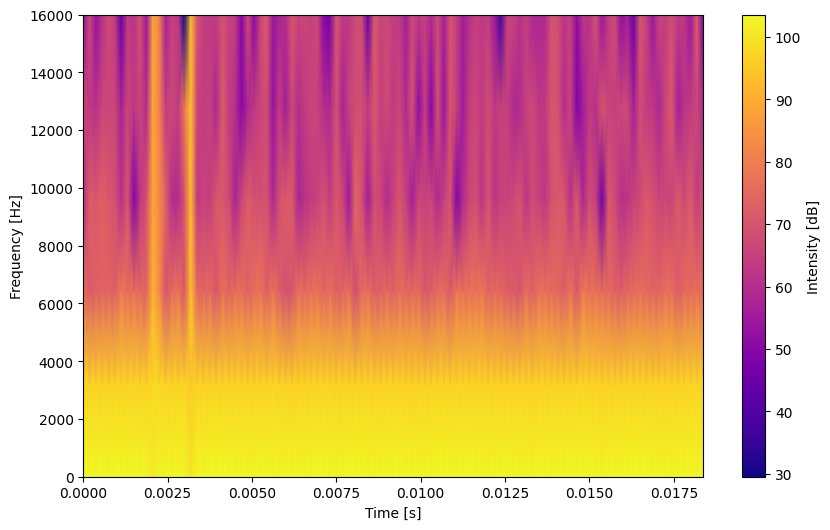

In [90]:
window_size = 5
window_size = int(window_size / X)
overlap = 2
overlap = int(overlap / X)
hop_size = window_size - overlap

num_windows = (num_subsampled_points - overlap) // hop_size

Sxx = np.zeros((window_size // 2 + 1, num_windows))

window = np.hamming(window_size)

for i in range(num_windows):
    start = i * hop_size
    segment = subsampled_data[start:start + window_size] * window
    fft_result = np.fft.rfft(segment)
    Sxx[:, i] = np.abs(fft_result) ** 2

frequencies = np.fft.rfftfreq(window_size, d=1/new_sampling_rate)
times = np.arange(num_windows) * (hop_size / new_sampling_rate)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='plasma')
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
# plt.title('Spectrogram of Subsampled Data')
plt.ylim(0, np.max(frequencies))
plt.show()

In [93]:
# whatver PCA time lol
from sklearn.decomposition import PCA

data_matrix = []

for stream_index, stream in enumerate(hyd.clean_list):
    for trace_index, trace in enumerate(stream.traces):
        data_matrix.append(trace.data)

data_matrix = np.array(data_matrix)

In [94]:
data_matrix.shape

(10, 19200000)

In [102]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(data_matrix)

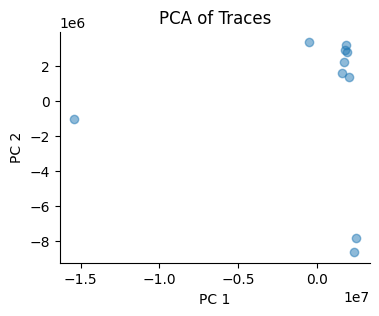

In [103]:
plt.figure(figsize=(4, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA of Traces')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.gca().spines['top'].set_visible(False); plt.gca().spines['right'].set_visible(False)
plt.show()

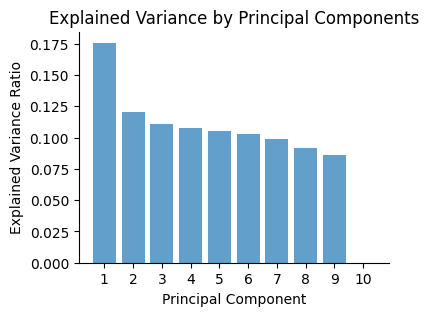

In [121]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(4, 3))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.gca().spines['top'].set_visible(False); plt.gca().spines['right'].set_visible(False)
plt.show()

In [123]:
explained_variance

array([1.75712818e-01, 1.20007941e-01, 1.11019979e-01, 1.07818848e-01,
       1.05035172e-01, 1.03096785e-01, 9.91259317e-02, 9.18225414e-02,
       8.63599830e-02, 9.75948772e-29])

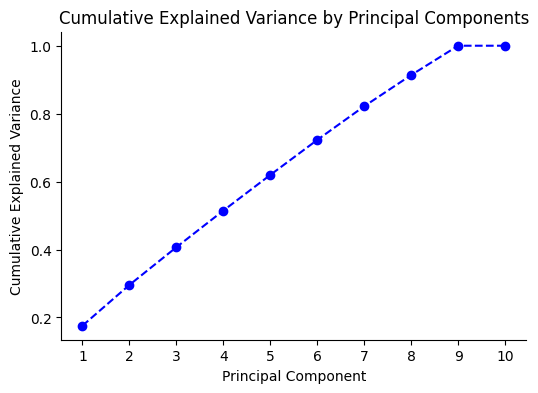

In [128]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, len(cumulative_variance) + 1))
# plt.grid()
plt.gca().spines['top'].set_visible(False); plt.gca().spines['right'].set_visible(False)  # Remove top and right spines
plt.show()